In [1]:
import re, string, nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')  # Download the tokenizer
nltk.download('stopwords')  # Download stopwords
nltk.download('wordnet')  # Download WordNet for lemmatization
nltk.download('omw-1.4')  # Additional resources for WordNet

# Load your data
df = pd.read_csv("505_resumes_data.csv", index_col=0).reset_index(drop=True)

# Function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub('http\S+\s*', ' ', text)
    # remove RT and cc
    text = re.sub('RT|cc', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', '', text)
    # remove mentions
    text = re.sub('@\S+', '  ', text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    # remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return text

# Function to tokenize the text
def tokenize_text(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    return tokens

# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  # Use English stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def lemmatize_tokens(tokens):
    # Function to perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def preprocess_resume(text):
    # Step 1: Clean the text
    text = clean_text(text)

    # Step 2: Tokenize the text
    tokens = tokenize_text(text)

    # Step 3: Remove stopwords
    tokens = remove_stopwords(tokens)

    # Step 4: Lemmatize tokens
    tokens = lemmatize_tokens(tokens)

    return tokens

df['cleaned_text'] = df['content'].apply(lambda x:clean_text(x))
df['tokens'] = df['content'].apply(lambda x:preprocess_resume(x))
df.head(2)

[nltk_data] Downloading package punkt to /Users/dna-
[nltk_data]     tuananguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/dna-
[nltk_data]     tuananguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dna-
[nltk_data]     tuananguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/dna-
[nltk_data]     tuananguyen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,file_name,title,word_count,special_count,cont_ount,content,name,contact,summary,skills,...,experience,certifications,accomplishments,achievements,hobbies,languages,linkedin,github,cleaned_text,tokens
0,ad9bik_aws-cloud-engineer-hyderabad-india.txt,cloud_engineer,2807,736,0,Devi Y\nDevOps/Cloud Engineer\nE-mail: ad9bik@...,0,0,1,1,...,18,0,0,0,0,4,0,4,Devi Y DevOps Cloud Engineer E mail ad9bik Pho...,"[Devi, Y, DevOps, Cloud, Engineer, E, mail, ad..."
1,adzp1l_aws-cloud-software-engineer-flint-mi.txt,cloud_engineer,2686,708,0,"Francis Ozorewor\n\n\nFlint, MI ***** • 810-**...",0,4,1,8,...,15,0,0,0,0,2,1,3,Francis Ozorewor Flint MI 810 adzp1l Professio...,"[Francis, Ozorewor, Flint, MI, 810, adzp1l, Pr..."


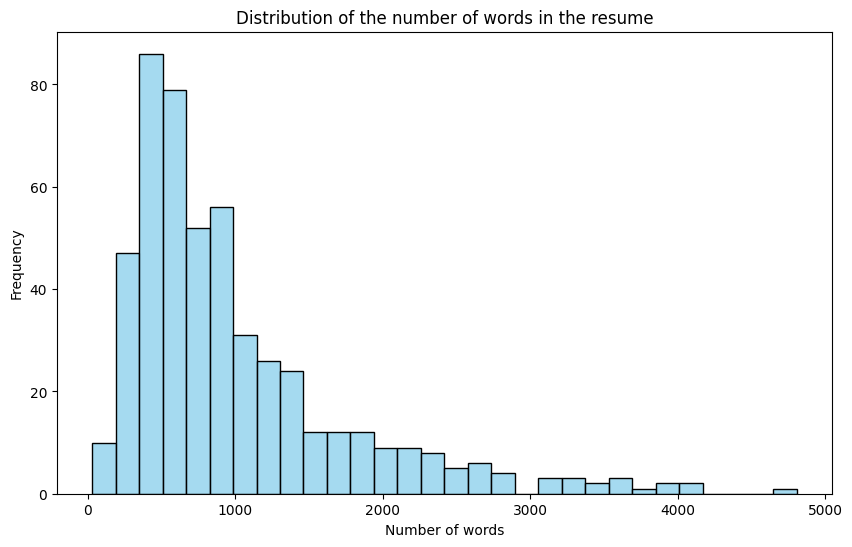

In [69]:
# Histogram of the number of words in the resume
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="word_count", bins=30, color="skyblue")
plt.title("Distribution of the number of words in the resume")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


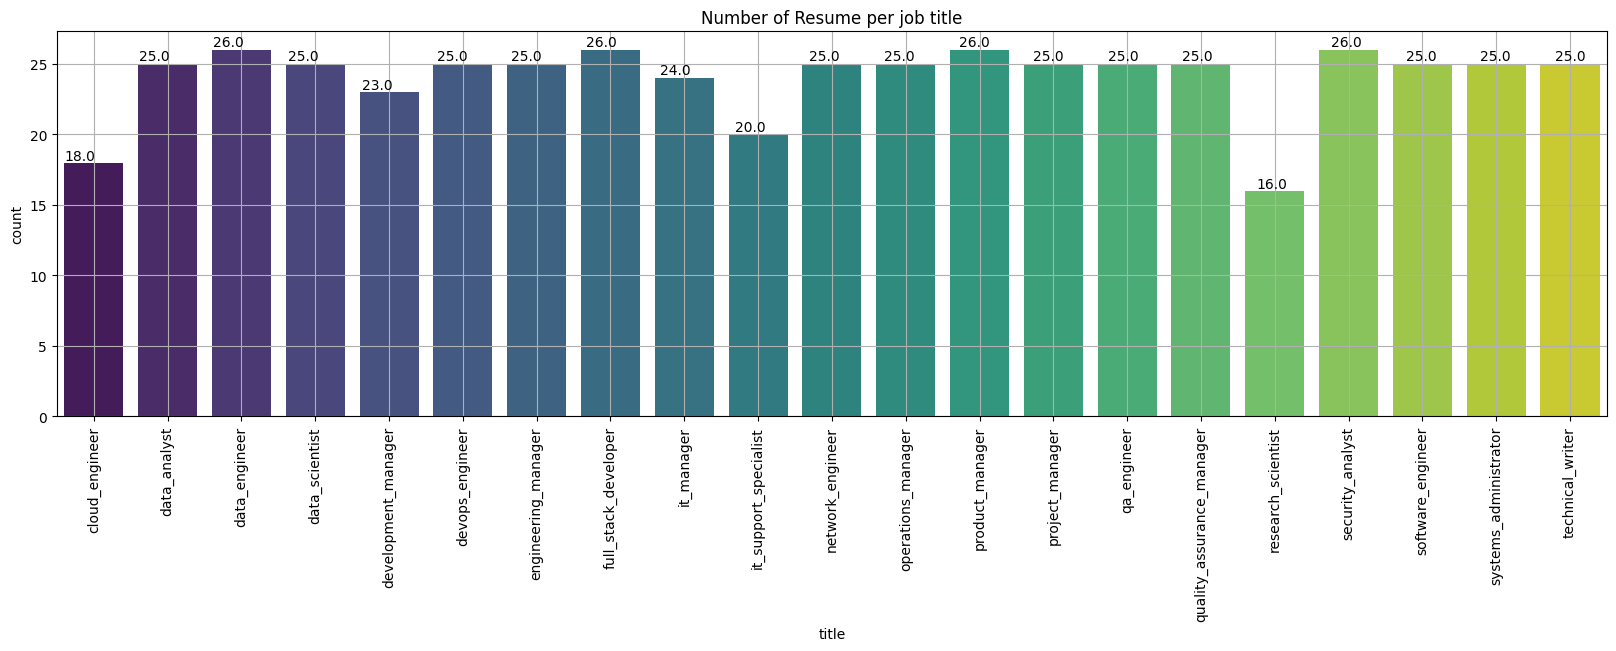

In [37]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
ax = sns.countplot(x="title", data=df, palette="viridis", hue="title")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.title("Number of Resume per job title")
plt.grid()
plt.show()

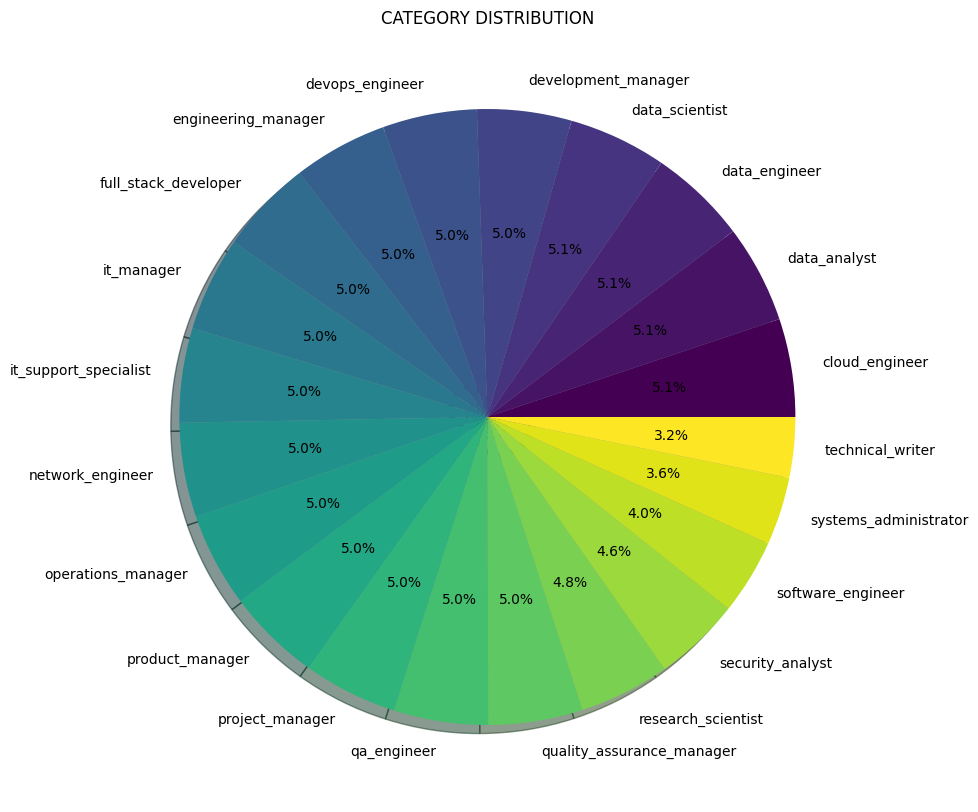

In [40]:
targetCounts = df['title'].value_counts()
targetLabels  = df['title'].unique()

# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('viridis')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=cmap(np.linspace(0, 1, len(targetCounts))))
plt.show()

/var/folders/r3/x33m7bkj4dxcdt5jwwgg27xc0000gn/T/ipykernel_8806/1177899908.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, count in mostcommon], y=[count for word, count in mostcommon], palette="viridis")


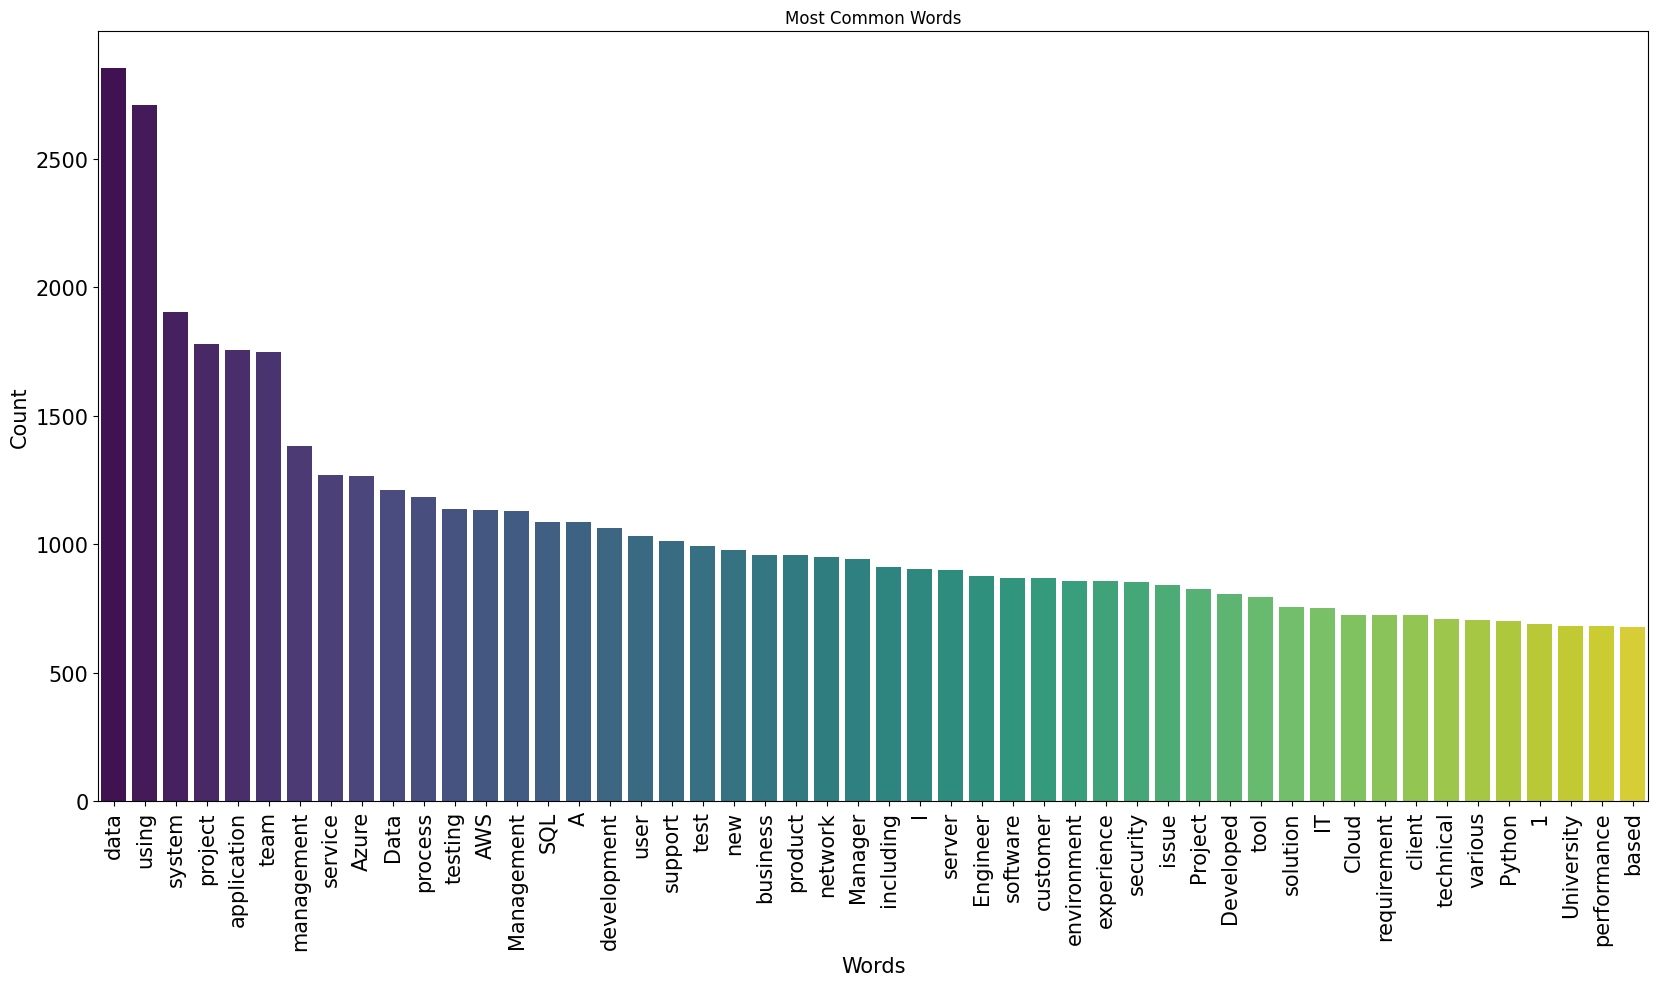

In [70]:
totalWords =[]
cleanedSentences = ""
for token in df['tokens'].values:
    for word in token:
        totalWords.append(word)
    cleanedSentences += "\n" + " ".join(token)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)

# Plot most common words using seaborn
plt.figure(figsize=(20,10))
plt.title('Most Common Words')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Count', fontsize=15)
sns.barplot(x=[word for word, count in mostcommon], y=[count for word, count in mostcommon], palette="viridis")
plt.show()



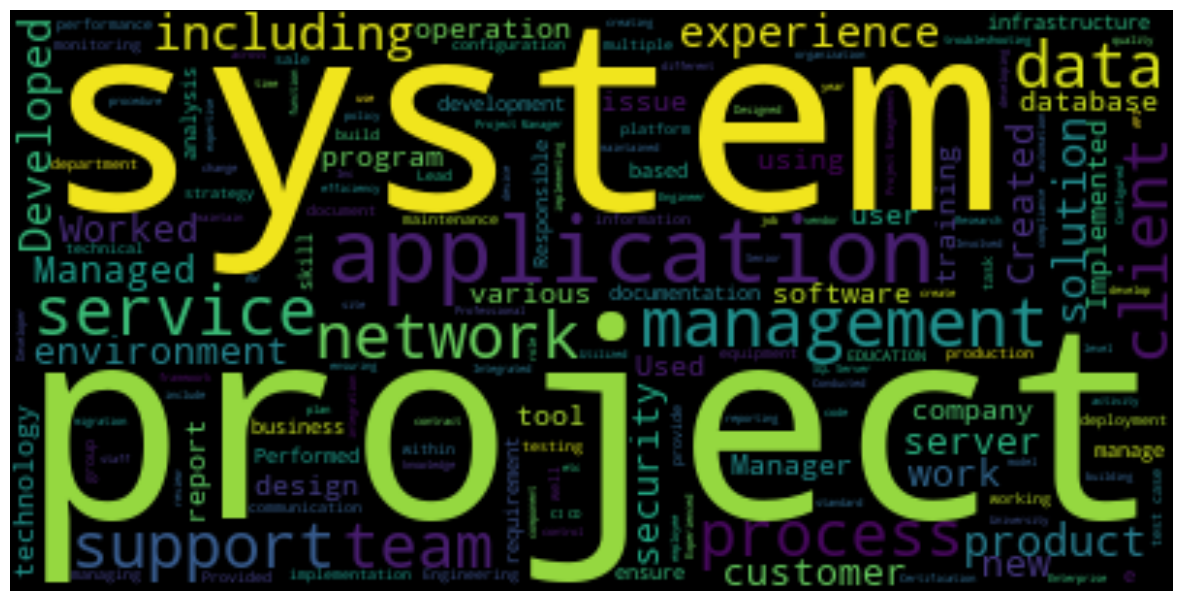

In [65]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()